In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import pandas as pd

data = {
    "Weight": [
        150, 170, 140, 130, 180, 200, 160, 155, 165, 175,   # Apple & Mango mix
        145, 172, 135, 128, 185, 195, 158, 152, 168, 178,   # More Apple & Mango
        142, 174, 137, 132, 182,                            # More Apple & Mango
        120, 125, 118, 130, 135, 138, 122, 140, 145, 150,   # Oranges lighter weight
        155, 160, 165, 170, 175                             # Overlap zone
    ],
    "Size": [
        7.0, 7.5, 6.8, 6.5, 8.0, 8.5, 7.2, 7.1, 7.3, 7.6,   # Apple & Mango
        6.9, 7.4, 6.6, 6.4, 8.1, 8.4, 7.0, 6.95, 7.35, 7.55,# More Apple & Mango
        6.7, 7.45, 6.65, 6.55, 8.2,                         # More Apple & Mango
        5.8, 6.0, 5.9, 6.1, 6.2, 6.3, 5.85, 6.4, 6.5, 6.6,  # Oranges smaller size
        6.7, 7.0, 7.1, 7.3, 7.4                             # Overlap zone
    ],
    "Sweetness": [
        7, 8, 6, 5, 9, 10, 8, 7, 8, 9,                      # Apple & Mango
        6, 8, 5, 4, 9, 10, 7, 6, 8, 9,                      # More Apple & Mango
        6, 8, 5, 5, 9,                                      # More Apple & Mango
        4, 5, 3, 4, 5, 6, 4, 5, 6, 6,                       # Oranges less sweet
        6, 7, 8, 8, 9                                       # Overlap zone
    ],
    "Fruit": [
        "Apple", "Apple", "Apple", "Apple", "Mango", "Mango", "Mango", "Apple", "Mango", "Mango",
        "Apple", "Apple", "Apple", "Apple", "Mango", "Mango", "Mango", "Apple", "Mango", "Mango",
        "Apple", "Apple", "Apple", "Apple", "Mango",
        "Orange", "Orange", "Orange", "Orange", "Orange", "Orange", "Orange", "Orange", "Orange", "Orange",
        "Orange", "Apple", "Mango", "Apple", "Mango"
    ]
}



df=pd.DataFrame(data)

x=df.drop('Fruit',axis=1)
y=df['Fruit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaled=StandardScaler()
xtrs=scaled.fit_transform(x_train)
xts=scaled.transform(x_test)
k=3
model=KNeighborsClassifier(n_neighbors=k)
model.fit(xtrs,y_train)
pred=model.predict(xts)
print('acc score:')
print(accuracy_score(y_test,pred))
print(f'confusion_matrix \n{confusion_matrix(y_test,pred)}')

acc score:
0.875
confusion_matrix 
[[1 0 0]
 [1 4 0]
 [0 0 2]]


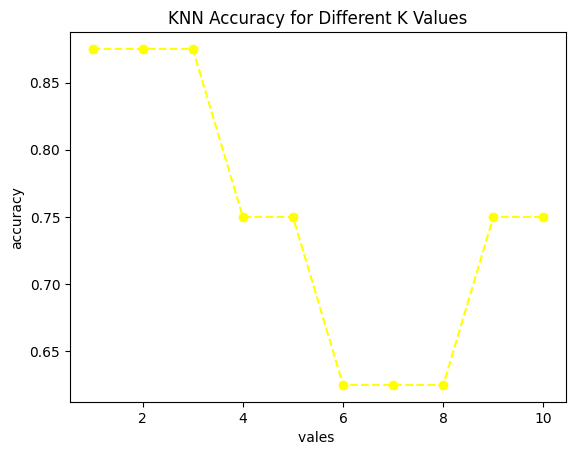

In [ ]:
kvalues=range(1,11)
scores=[]
for k in kvalues:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(xtrs,y_train)
  preds=knn.predict(xts)
  scores.append(accuracy_score(y_test,preds))
plt.plot(kvalues,scores,linestyle='--',marker='o',color='yellow')
plt.title('KNN Accuracy for Different K Values')
plt.xlabel('vales ')
plt.ylabel('accuracy')
plt.show()


